### Comparing Preeya and Tom Method for Accuracy Plots

In [1]:
from analysis import bender_class, original_bender_class, train_test_split
from config import path_to_repository
import pandas as pd
import os
import numpy as np

# Tom Method

See cell block 53 in jupyter notebook "analysis_tom_initial" (Tom's Old analysis notebook).

It appears that in train_test_split, shuffle is automatically set to True if not included:  https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html
        
Given three accuracy plots, calculate average and std of accuracy across three plots for each angle.  This is how a "master" accuracy plot is created with error bars.  Individual accuracy plot is calculated with the following code using old bender_class methods:

Found 1 CSV files.


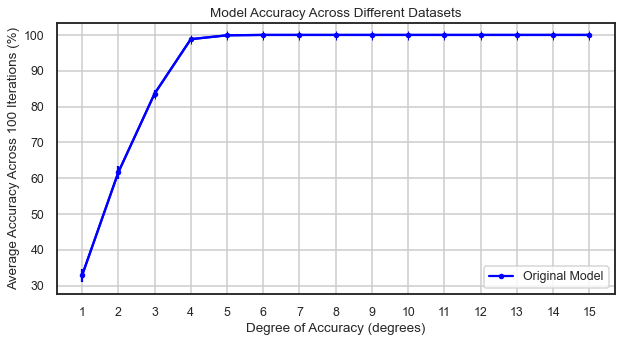

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize

g = original_bender_class(data=pd.DataFrame())
#path contains 4 csv files
path = os.path.join(path_to_repository, 'CSV Data/11_21_2024/1p5/*.csv')
g.read_data_2(path) # normalize from 0 to 1, not over R0

# Initialize parameters for accuracy calculation
degree_of_accuracies = list(range(15, 0, -1))  # From 10 to 1
all_accuracies_first = []
all_accuracies_std = []

# Calculate average accuracy for the first dataset using train_test
for degree in degree_of_accuracies:
    accuracies = []
    
    ### 100 iterations 
    for _ in range(100):  # Shuffle automatically set to true in train_test_split -> https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html
        
        ### Each iteration: 
        ## g.test_train splits up data, fits a model, and computes accuracy on held-out model 
        ## yields one degree: 
        accuracy = g.train_test(deg_accuracy=degree)  # Use train_test for the first dataset
        accuracies.append(accuracy)
    
    ### Track mean over all 100 models fit to slightly diff training data of same dataset accuracy: 
    all_accuracies_first.append(np.mean(accuracies)) # not calculating error bar here but could have
    all_accuracies_std.append(np.std(accuracies))

# Plot all accuracies on the same plot
plt.figure(figsize=(10, 5))
plt.plot(degree_of_accuracies, all_accuracies_first, marker='.', label='Original Model', color='blue')
plt.errorbar(degree_of_accuracies, all_accuracies_first, yerr=all_accuracies_std, marker='|', color='blue')
# Customize plot
plt.title('Model Accuracy Across Different Datasets')
plt.xlabel('Degree of Accuracy (degrees)')
plt.ylabel('Average Accuracy Across 100 Iterations (%)')
plt.xticks(degree_of_accuracies)  # Set x-ticks to correspond to degrees
plt.legend()  # Add legend to differentiate datasets
plt.grid()

### Tom's old method to train model on one dataset and apply to others

from old bender_class predict_new_data method: see cell block 53 again in notebook analysis_tom_initial (old analysis)

use model developed in first dataset and apply it to next dataset and determine how well it predicts accuracy for each angle from 1 to 15 deg.   Run that test 100 times per angle and then average the accuracies for each angle. So each angle will have one accuracy number.  

Given three different datasets, the reapplication accuracy plots may look substantially different, and hence the error bars are larger as the angle gets smaller

### This is how Tom is producing error bars for master plot in notebook "all_data_accuracy"

all other error bars in all other notebooks produced using updated bender_class method:  plot_accuracy

# Preeya Method

Individual accuract plot determined using updated bender_class methods:  train_model_test_accuracy, accuracy_by_angle, and plot_accuracy

Firs split data into 80% train and and 10% test.  Test accuracy for each angle (1-15 deg).  Store this accuracy in a list. Then shuffle data into another 80% train and 10% test and repeat above.  Do this niter times.  An average and std can be obtained for each angle from the niter times of running train_model_test_accuracy and accuracy_by_angle methods.  

### Reapplication Accuracies:  Obtainng Accuracy plot from previously train model on different dataset

In [ ]:
# For each dataset -- show training and testing on individual datasets
for i_d, datafiles in enumerate(DS_all):
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_bw_01()
    g.train_model_test_accuracy()
    g.plot_accuracy(title='DS %d'%i_d)

    ## Now test data on other datasets
    ixs = [0, 1, 2]
    ixs.remove(i_d)
    
    ## Iterate over other datasets 
    g2 = bender_class()
    g2.load_data(DS_all[ixs[0]])
    g2.normalize_adc_bw_01()
    g3 = bender_class()
    g3.load_data(DS_all[ixs[1]])
    g3.normalize_adc_bw_01()
   

    df_combined = pd.concat([g2.data, g3.data], ignore_index=True)

    acc = []; 
    for i in range(10): 
        _, dftest = train_test_split(df_combined, test_size=0.1, shuffle=True)
        acc.append(g.predict_new_data(dftest))
    acc = np.vstack((acc))
    
    g.plot_accuracy(title='train DS %d, test others'%i_d, accuracy=acc)